## Modèle de classification

In [ ]:
!pip install mlflow scikit-learn pandas matplotlib seaborn

🎯 Cas d’usage : Classification de tumeurs (Maligne vs Bénigne)

🧠 2. 🧪 **Entraînement + Tracking MLflow dans une cellule**

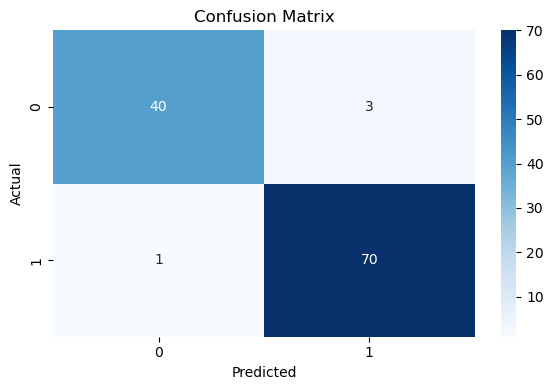

In [2]:
import mlflow
import mlflow.sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlflow.models.signature import infer_signature

# Chargement des données
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lancement du tracking MLflow
with mlflow.start_run():
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    mlflow.log_param("model_type", "RandomForestClassifier")
    mlflow.log_metric("accuracy", acc)

    signature = infer_signature(X_test, clf.predict(X_test))
    mlflow.sklearn.log_model(clf, "model", signature=signature, input_example=X_test.iloc[:1])

    # Sauvegarde et log d’une image
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")


🔍 3. 🖥️ **Démarrer MLflow UI en dehors du Notebook**

1. mlflow ui (dans bash ou power shell)
2. Accède à http://localhost:5000

🚀 **Ce qu'il est possible d'explorer via MLflow UI** :

- Les paramètres et métriques

- Le modèle RandomForest sauvegardé

- Le graphique de la matrice de confusion

